# Birth-Death

This is for an integrated test of E-Cell4. Here, we test a simple birth-death process in volume.

In [1]:
%matplotlib inline
from ecell4.prelude import *

Parameters are given as follows. `D` and `radius` mean a diffusion constant and a radius of molecules, respectively. Dimensions of length and time are assumed to be micro-meter and second.

In [2]:
D = 1  # 0.01
radius = 0.005

In [3]:
N = 20  # a number of samples

In [4]:
y0 = {} # {'A': 60}
duration = 3
V = 8

Make a model for all algorithms. No birth reaction with more than one product is accepted.

In [5]:
with species_attributes():
    A | {'radius': radius, 'D': D}

with reaction_rules():
    ~A > A | 45.0
    A > ~A | 1.5

m = get_model()

Save a result with `ode` as `obs`, and plot it:

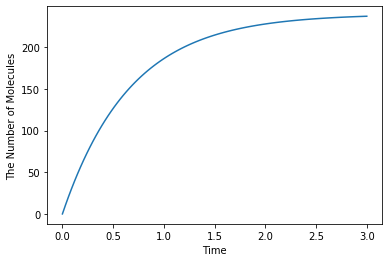

In [6]:
ret1 = run_simulation(duration, y0=y0, volume=V, model=m)
ret1

Simulating with `gillespie` (Bars represent standard error of the mean):

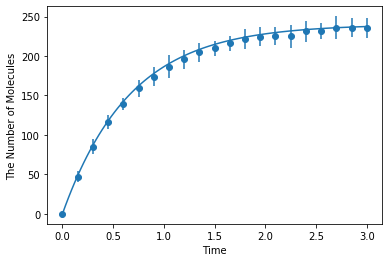

In [7]:
ret2 = ensemble_simulations(duration, ndiv=20, y0=y0, volume=V, model=m, solver='gillespie', repeat=N)
ret2.plot('o', ret1, '-')

Simulating with `meso`:

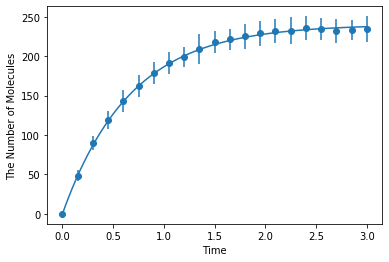

In [8]:
ret2 = ensemble_simulations(
    duration, ndiv=20, y0=y0, volume=V, model=m, solver=('meso', Integer3(3, 3, 3), 0.25), repeat=N)
ret2.plot('o', ret1, '-')

Simulating with `spatiocyte`:

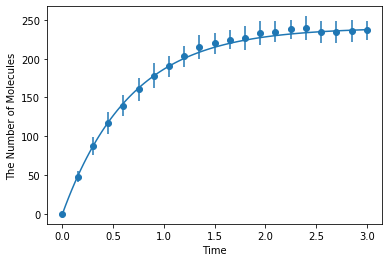

In [9]:
ret2 = ensemble_simulations(
    duration, ndiv=20, y0=y0, volume=V, model=m, solver=('spatiocyte', radius), repeat=N)
ret2.plot('o', ret1, '-')

Simulating with `egfrd`:

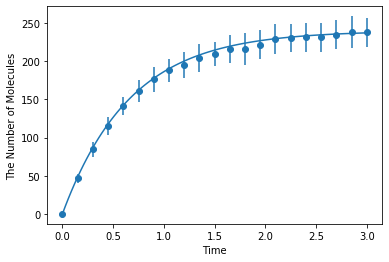

In [10]:
ret2 = ensemble_simulations(
    duration, ndiv=20, y0=y0, volume=V, model=m, solver=('egfrd', Integer3(8, 8, 8)), repeat=N)
ret2.plot('o', ret1, '-')

Simulating with `bd`:

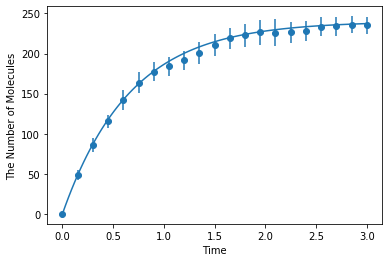

In [11]:
ret2 = ensemble_simulations(
    duration, ndiv=20, y0=y0, volume=V, model=m, solver=('bd', Integer3(8, 8, 8), 0.1), repeat=N)
ret2.plot('o', ret1, '-')